In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../modules")
import PBD_analog
import matplotlib as mpl
plt.style.use("customstyle")
norm = mpl.colors.Normalize(vmin=0, vmax=1)
from scipy.misc import derivative

We have the rates 
$$ \tilde\lambda (\lambda_1, \lambda_2, \lambda_3, \mu_1, \mu_2) = (1-\pi) \lambda_1 \quad \text{and} \quad \tilde\mu  (\lambda_1, \lambda_2, \lambda_3, \mu_1, \mu_2)= \mu_1.$$
with 
$\pi = \frac{\lambda_2 + \lambda_3 + \mu_2}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right)$.

Then naturally 
$$\frac{\partial \tilde\lambda}{\partial \lambda_1} = (1-\pi)$$
and 
$$\frac{\partial \tilde\lambda}{\partial \lambda_2} = -\frac{\partial \pi}{\partial \lambda_2} \lambda_1$$



Partial derivatives of $\pi$ (fun part):

\begin{align}
\frac{\partial \pi}{\partial \lambda_2} &= \frac{1}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\lambda_2+\lambda_3 + \mu_2}{2\lambda_3} \left( \frac{-\frac{8\lambda_3\mu_2}{(\lambda_2+\lambda_3+\mu_2)^3}}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} } \right) 
\\
&= \frac{\pi }{\Lambda} -  \frac{2\mu_2}{\Lambda^2 \sqrt{1-4\frac{\lambda_3\mu_2}{\Lambda^2}}}
\\ 
&= \frac{\pi}{\Lambda} - \frac{2\mu_2}{\Lambda \sqrt{\Lambda^2-4\lambda_3\mu_2}}.
\end{align}


With $\lambda_3$:
\begin{align}
\frac{\partial \pi}{\partial \lambda_3} &= \frac{1}{2}\frac{\lambda_3-(\lambda_2+\lambda_3+\mu_2)}{\lambda_3^2} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\lambda_2 + \lambda_3 + \mu_2}{2\lambda_3} \times \left( -\frac{\partial u}{\partial \lambda_3} \frac{1}{2 \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}} \right) 
\end{align}
with $u =  1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}$. So 
\begin{align}
\frac{\partial u}{\partial \lambda_3} &= -4\frac{\mu_2 \Lambda^2 - 2\lambda_3\mu_2 \Lambda}{\Lambda^4} 
\\
& = -4\mu_2\frac{\lambda_2 + \mu_2 - \lambda_3}{\Lambda^3}
\end{align} 
then the partial derivatives of the probability $\pi$ reduces in 
\begin{align}
\frac{\partial \pi}{\partial \lambda_3} &= -\frac{\lambda_2+\mu_2}{2\lambda_3^2} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) + \frac{\Lambda}{4\lambda_3} \frac{4\mu_2(\lambda_2+\mu_2-\lambda_3)}{\Lambda^3\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\\
& = -\frac{\lambda_2+\mu_2}{\Lambda\lambda_3} \pi + \frac{\mu_2}{\lambda_3\Lambda^2} \frac{\lambda_2+\mu_2-\lambda_3}{\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}}.
\end{align}

With $\mu_2$
\begin{align}
\frac{\partial \pi}{\partial \mu_2} = \frac{1}{2\lambda_3} \left(  1 - \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}  \right) - \frac{\lambda_2+\lambda_3+\mu_2}{2\lambda_3} \frac{\partial u}{\partial \mu_2} \frac{1}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\end{align}
with 
\begin{align}
\frac{\partial u}{\partial \mu_2} &= -4 \frac{\lambda_3 (\lambda_2+\lambda_3+\mu_2)^2 - 2\lambda_3\mu_2  (\lambda_2+\lambda_3+\mu_2)}{ (\lambda_2+\lambda_3+\mu_2)^4} 
\\ 
&= -4 \lambda_3 \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^3}
\end{align}
so 
\begin{align}
\frac{\partial \pi}{\partial \mu_2} &= \frac{\pi}{\Lambda} + \frac{\Lambda}{2\lambda_3}\times 4 \lambda_3 \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^3} \frac{1}{2\sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}} }
\\ 
& = \frac{\pi}{\Lambda} + \frac{\lambda_2+\lambda_3-\mu_2}{\Lambda^2 \sqrt{ 1 - 4\frac{\lambda_3 \mu_2}{(\lambda_2 + \lambda_3 + \mu_2)^2}}}.
\end{align}
We still have 
$$\frac{\partial \tilde\lambda}{\partial \mu_2} = -\frac{\partial \pi}{\partial \mu_2} \lambda_1.$$

Implemented in `modules/PBD_analog.py`. 

Checking the obtained values

d lambda / d l1
Analytical partial derivative : 0.8833829360685738
Numerical partial derivative  : 0.8833829360685858
d lambda / d l2
Analytical partial derivative : 0.015965148544765623
Numerical partial derivative  : 0.015965154559385852
d lambda / d l3
Analytical partial derivative : 0.01410333979624594
Numerical partial derivative  : 0.014103342434082511
d lambda / d m1
Analytical partial derivative : 0.0
Numerical partial derivative  : 0.0
d lambda / d m2
Analytical partial derivative : -0.12093718809915402
Numerical partial derivative  : -0.12093721280220793
d mu / d l1
Analytical partial derivative : 0.0
Numerical partial derivative  : 4.163336342344337e-14
d mu / d l2
Analytical partial derivative : 0.0
Numerical partial derivative  : -2.7755575615628914e-14
d mu / d l3
Analytical partial derivative : 0.0
Numerical partial derivative  : 0.0
d mu / d m1
Analytical partial derivative : 1.0
Numerical partial derivative  : 0.999999999999987
d mu / d m2
Analytical partial derivative

Text(0, 0.5, 'mu')

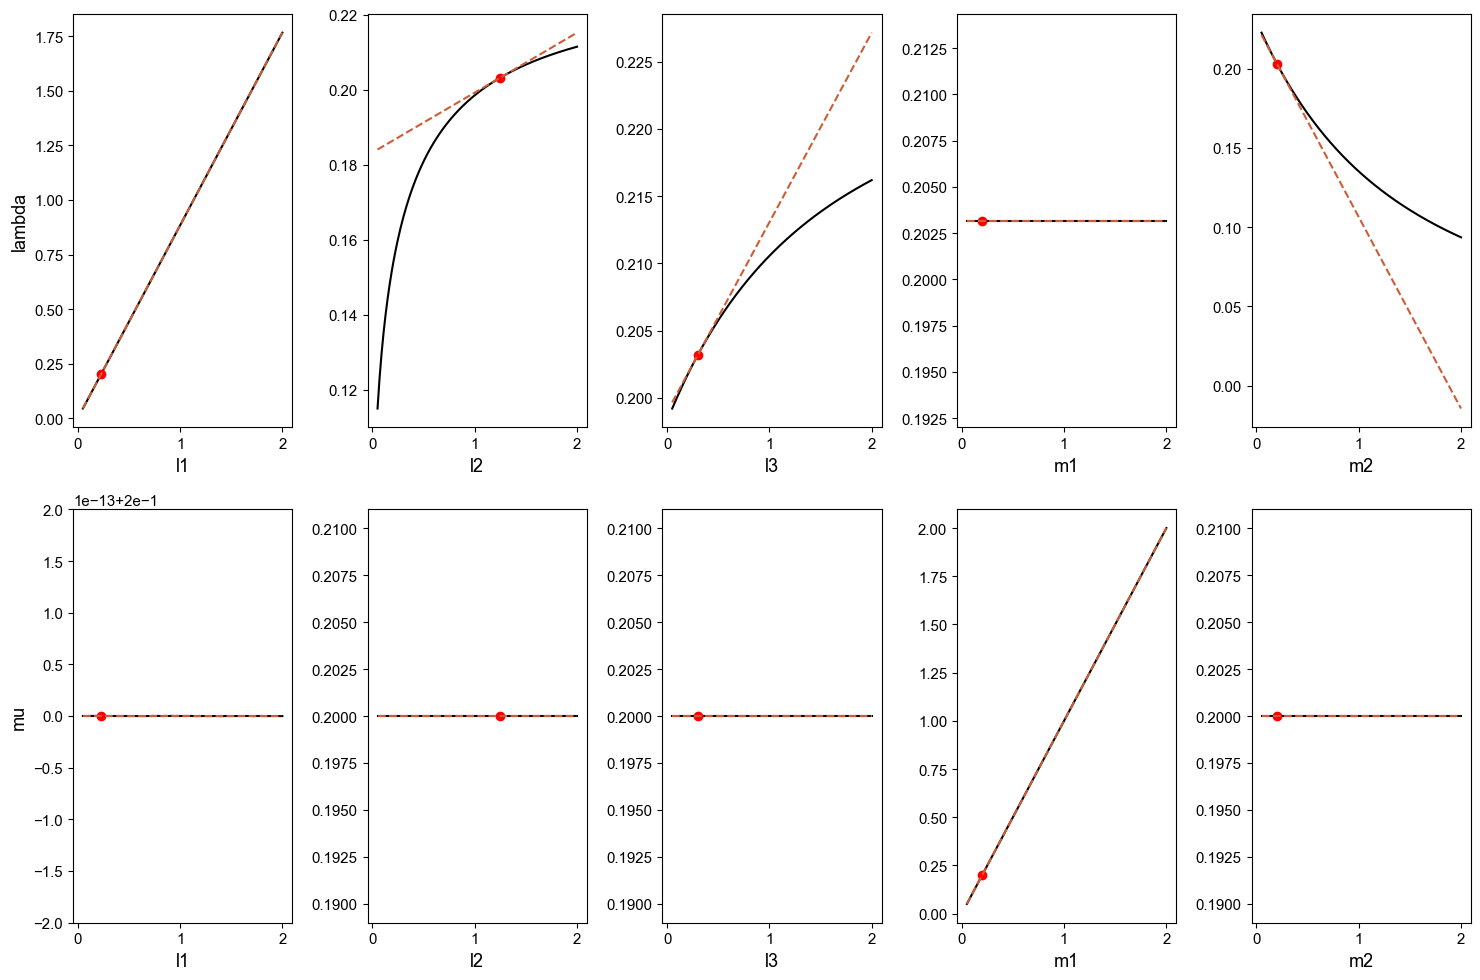

In [2]:
fig, axes = plt.subplots(2,5,figsize = (15,10))
param = dict(l1 = 0.23, l2 = 1.25, l3 = 0.3, m1 = 0.2, m2 = 0.2)
parnames = ['l1', 'l2', 'l3', 'm1', 'm2']
rate_names = ['lambda', 'mu']
def analog_bd(i_bd, l1, l2, l3, m1, m2):
    return PBD_analog.analog_BD_rates(l1, l2, l3, m1, m2)[i_bd]

# Check derivatives
for i_bd in (0,1):
    for i_pbd in range(5):
        
        par_vary = parnames[i_pbd]
        print('d {} / d {}'.format(rate_names[i_bd], par_vary))
        analyt_dfdx = PBD_analog.jacobian_analog_bd(i_bd, i_pbd, **param)
        print("Analytical partial derivative : " + str(analyt_dfdx))

        other_param = param.copy()
        other_param.pop(par_vary)

        def f(x):
            return analog_bd(i_bd = i_bd, **{par_vary : x}, **other_param)
        x0 = param[par_vary]
        x = np.linspace(0.05, 2, 200)
        y =  f(x)

        y0 = f(x0)
        ax = axes[i_bd, i_pbd]
        ax.plot(x, y)
        ax.plot([x0], [y0], ls = "", marker = "o", color = "red")

        # derivative
        dydx0 = derivative(f, x0, dx = 0.001)
        #dydx = np.diff(y) / np.diff(x)
        #i = np.argmax(x > x0)
        #dydx0 = dydx[i]
        print("Numerical partial derivative  : "+str(dydx0))

        #ax.plot(x, y0 + (x-x0)*dydx0, ls = ":")
        ax.plot(x, y0 + (x-x0)*analyt_dfdx, ls = "--");
        ax.set_xlabel(par_vary)

axes[0,0].set_ylabel(rate_names[0])
axes[1,0].set_ylabel(rate_names[1])

Text(0.5, 0.98, 'Relative influence of the PBD parameters on the BD equivalent constant rates')

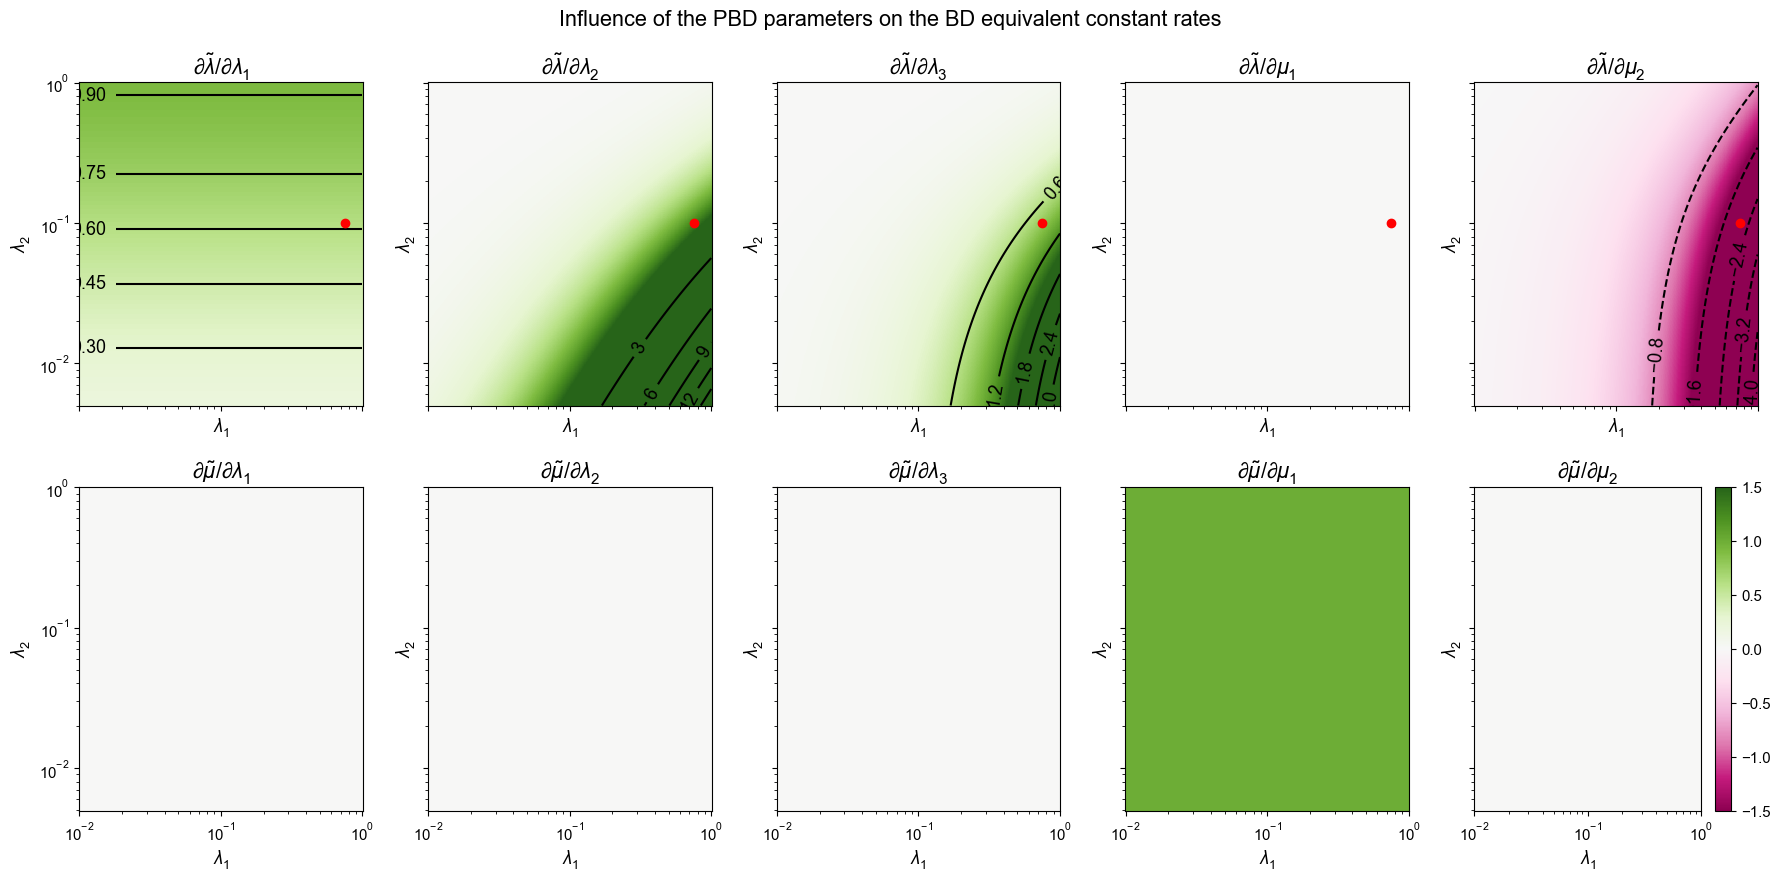

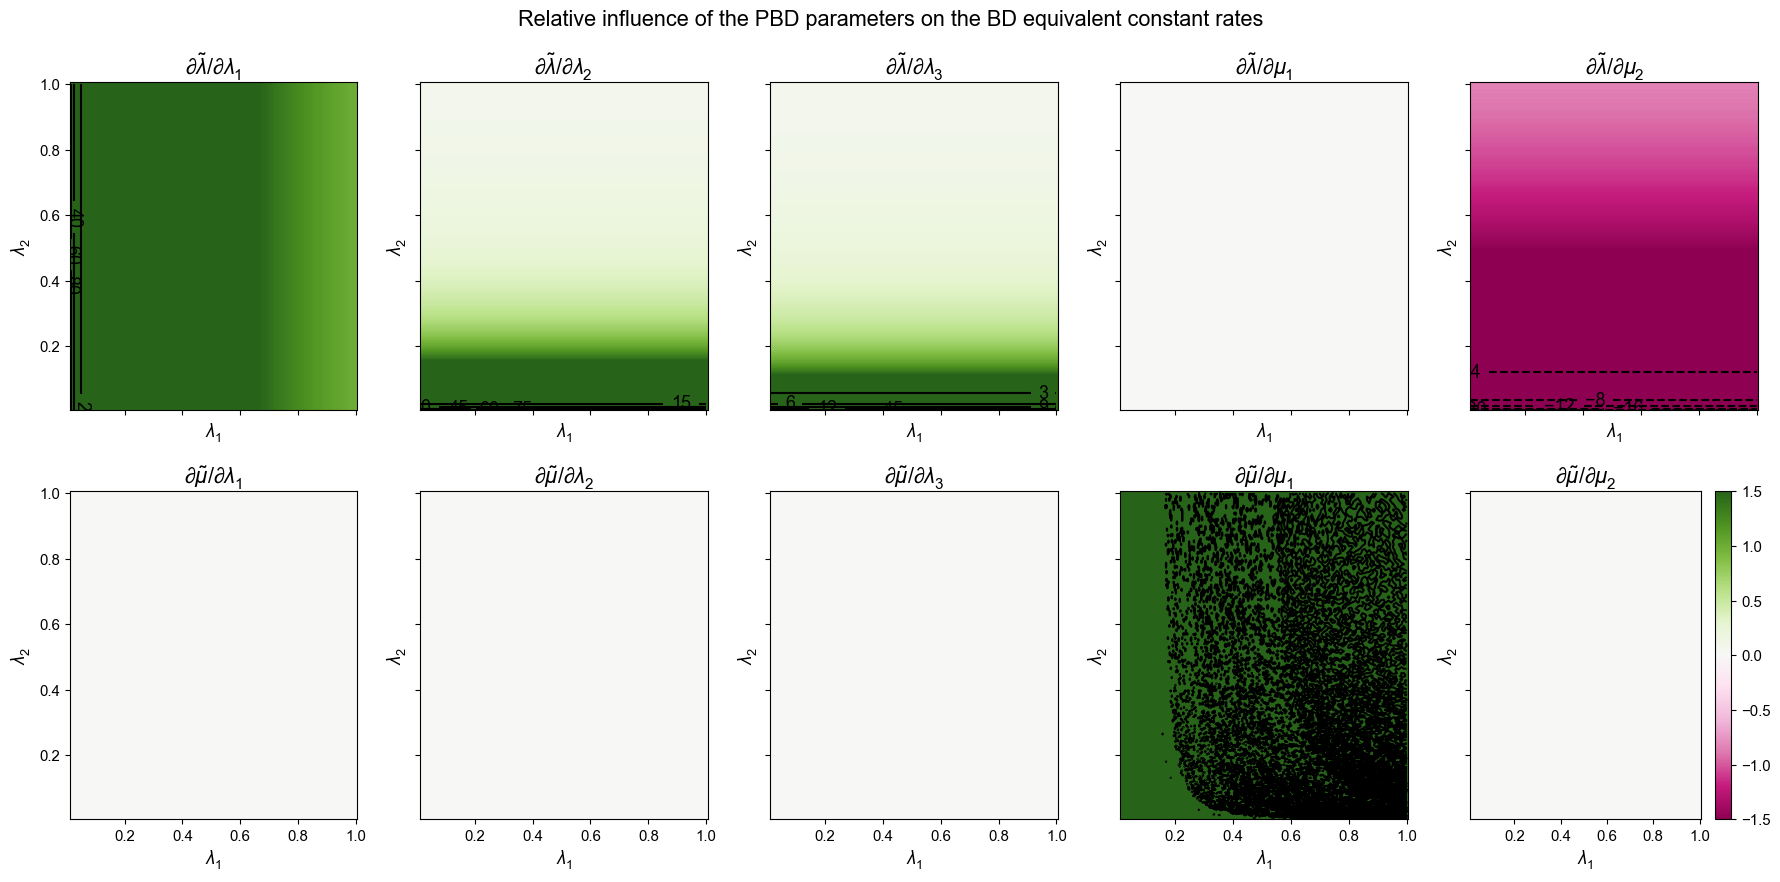

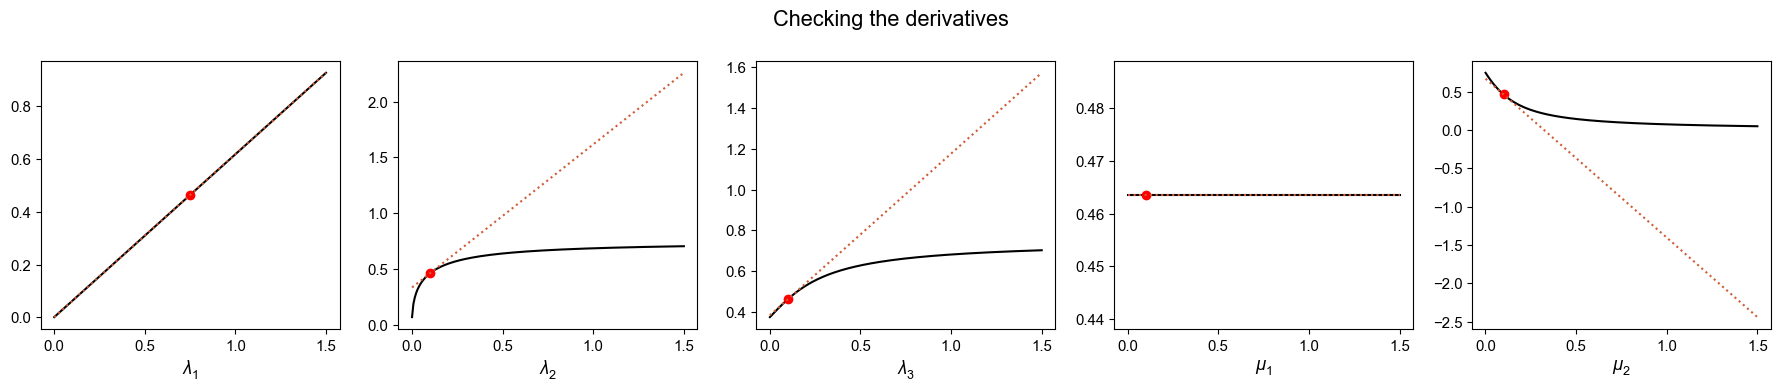

In [3]:
fig, axes = plt.subplots(2, 5,figsize = (18,9), sharex=True, sharey=True)
fig_r, axes_r = plt.subplots(2, 5,figsize = (18,9), sharex=True, sharey=True)
fig2, axes2 = plt.subplots(1, 5, figsize = (18,4))
bd_names = ["\\lambda", "\\mu"]
pbd_names = ["\\lambda_1", "\\lambda_2", "\\lambda_3", "\\mu_1", "\\mu_2"]
pbd_args = ['l1', 'l2', 'l3', 'm1', 'm2']
l1 = np.geomspace(0.01,1.0,500)
l2 = np.geomspace(0.005,1.0,500)
par = dict(l3 = 0.1, m1 = 0.1, m2 = 0.1)

example = (0.75, 0.1)
default = dict(l1 = example[0], l2 = example[1], **par)
y0 = PBD_analog.analog_BD_rates(**default)[0]

colormap = dict(cmap = "PiYG", vmin = -1.5, vmax = 1.5)

#levels = np.arange(0,1.6,0.1)


varJac = np.zeros((2, 5, len(l2), len(l1)))

for i_bd in (0,1):
    for i_pbd in range(5):
        Z = np.zeros((len(l2), len(l1)))
        F = np.zeros_like(Z)
        for i1 in range(len(l1)):
            for i2 in range(len(l2)):
                Z[i2, i1] = PBD_analog.jacobian_analog_bd(i_bd, i_pbd, l1[i1], l2[i2], **par)
                varJac[i_bd, i_pbd, i2, i1] = Z[i2, i1]
                F[i2, i1] = PBD_analog.analog_BD_rates(l1[i1], l2[i2], **par)[i_bd]
                ax = axes[i_bd, i_pbd]
        ax = axes[i_bd, i_pbd]
        ax.set_xscale("log")
        ax.set_yscale("log")

        im = ax.pcolormesh(l1, l2, Z, **colormap)
        cont = ax.contour(l1, l2, Z, colors = "k", levels = 5)
        ax.clabel(cont, cont.levels)

        # relative diff
        ax_r = axes_r[i_bd, i_pbd]
        im_r = ax_r.pcolormesh(l1, l2, Z/F, **colormap)
        cont = ax_r.contour(l1, l2, Z/F, colors = "k", levels = 5)
        ax_r.clabel(cont, cont.levels)
        
        for axx in (ax, ax_r):
            axx.set_title("$\\partial \\tilde{} / \\partial{}$".format(bd_names[i_bd], pbd_names[i_pbd]))
            axx.set_xlabel("${}$".format(pbd_names[0]))
            axx.set_ylabel("${}$".format(pbd_names[1]))
        
        if i_bd == 0:
            ax.plot([example[0]], [example[1]], ls = "", marker = "o", color = "red")
            x0 = default[pbd_args[i_pbd]] 
            x = np.linspace(0.001, 1.5, 200)

            param = default.copy()
            param[pbd_args[i_pbd]] = x
            y = PBD_analog.analog_BD_rates(**param)[0]

            axes2[i_pbd].plot(x, y)
            axes2[i_pbd].plot([x0],[y0], ls = "", marker = "o", color = "red")

            # derivative
            dfdx = PBD_analog.jacobian_analog_bd(0, i_pbd, **default)
            axes2[i_pbd].plot(x, y0 + dfdx*(x-x0), ls = ":")

            axes2[i_pbd].set_xlabel("${}$".format(pbd_names[i_pbd]))

fig2.suptitle("Checking the derivatives")

fig.colorbar(im)
fig.suptitle("Influence of the PBD parameters on the BD equivalent constant rates")

fig_r.colorbar(im_r)
fig_r.suptitle("Relative influence of the PBD parameters on the BD equivalent constant rates")

Text(0.5, 0.98, 'Relative influence of the PBD parameters on the BD equivalent constant birth rate')

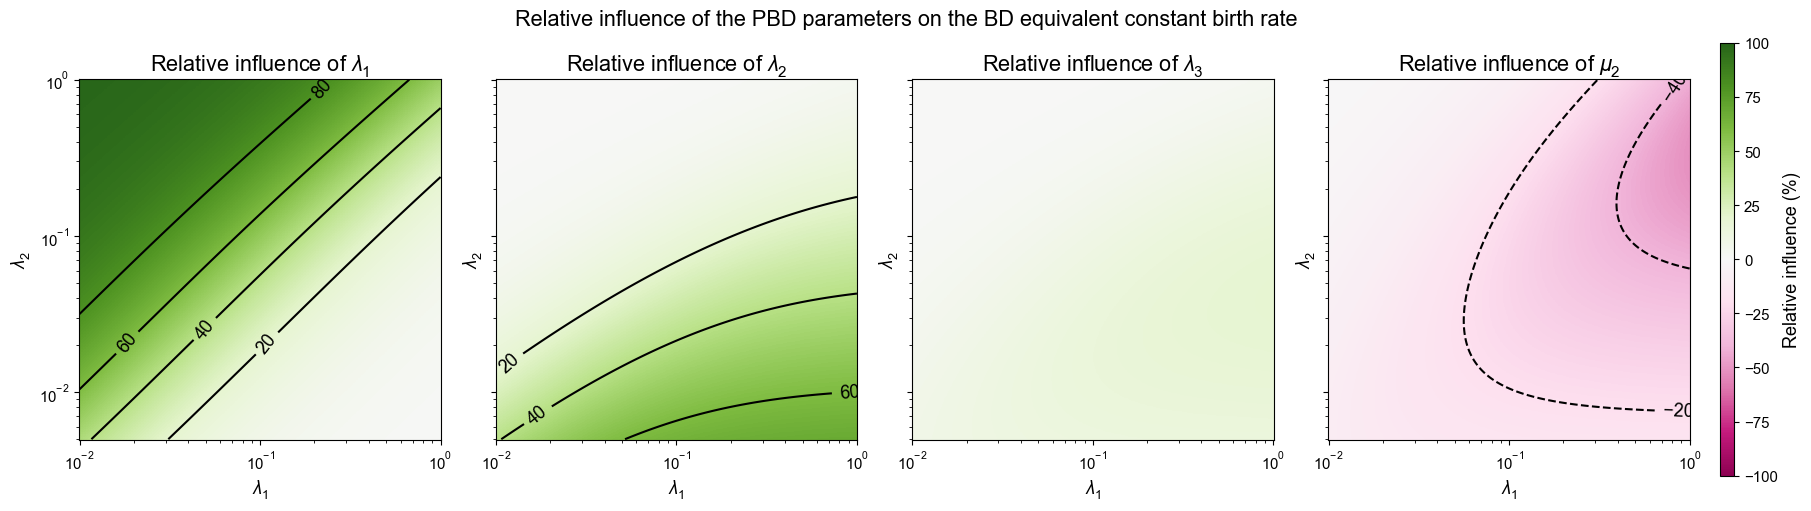

In [4]:
# relative values of the partial derivatives 
sumJac = np.sum(np.abs(varJac), axis = 1)
relatJac = np.zeros_like(varJac)
for i_pbd in range(5):
    relatJac[:, i_pbd, :, :] = varJac[:, i_pbd, :, :] / sumJac

fig, axes = plt.subplots(1, 4,figsize = (18,5), sharex=True, sharey=True, layout = "constrained")
relatJac = 100 * relatJac
colormap = dict(cmap = "PiYG", vmin = -100, vmax = 100)

levels = np.linspace(-100, 100, 11)

#examples = [(0.03, 0.2, 'A'), ()

for i in range(4):
    i_pbd = [0,1,2,4][i]
    ax = axes[i]
    ax.set_xscale("log")
    ax.set_yscale("log")
    im = ax.pcolormesh(l1, l2, relatJac[0, i_pbd, :, :], **colormap)
    cont = ax.contour(l1, l2, relatJac[0, i_pbd, :, :], colors = "k", levels = levels)
    ax.clabel(cont, cont.levels)
    
    for axx in (ax, ax_r):
        axx.set_title("Relative influence of ${}$".format(pbd_names[i_pbd]))
        axx.set_xlabel("${}$".format(pbd_names[0]))
        axx.set_ylabel("${}$".format(pbd_names[1]))
    

fig.colorbar(im, label = "Relative influence (%)", shrink = 1.2, aspect = 30)
fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant birth rate")


In [5]:
l1 = np.geomspace(0.01,1.0,200)
l2 = np.geomspace(0.005,1.0,200)
m2 = np.geomspace(0.005,1.0,200)
par = dict(l3 = 0.1, m1 = 0.1, m2 = 0.1)


varJacl1l2 = np.zeros((2, 5, len(l2), len(l1)))

for i_bd in (0,1):
    for i_pbd in range(5):
        Z = np.zeros((len(l2), len(l1)))
        F = np.zeros_like(Z)
        for i1 in range(len(l1)):
            for i2 in range(len(l2)):
                Z[i2, i1] = PBD_analog.jacobian_analog_bd(i_bd, i_pbd, l1 = l1[i1], l2 = l2[i2], **par)
                varJacl1l2[i_bd, i_pbd, i2, i1] = Z[i2, i1]


varJacm2l2 = np.zeros((2, 5, len(l2), len(m2)))
par = dict(l1 = 0.1, l3 = 0.1, m1 = 0.1)
for i_bd in (0,1):
    for i_pbd in range(5):
        Z = np.zeros((len(l2), len(l1)))
        F = np.zeros_like(Z)
        for i1 in range(len(m2)):
            for i2 in range(len(l2)):
                Z[i2, i1] = PBD_analog.jacobian_analog_bd(i_bd, i_pbd, m2 = m2[i1], l2 = l2[i2], **par)
                varJacm2l2[i_bd, i_pbd, i2, i1] = Z[i2, i1]


# relative values of the partial derivatives 
sumJac = np.sum(np.abs(varJacl1l2), axis = 1)
relatJacl1l2 = np.zeros_like(varJacl1l2)
for i_pbd in range(5):
    relatJacl1l2[:, i_pbd, :, :] = varJacl1l2[:, i_pbd, :, :] / sumJac
relatJacl1l2 = 100 * relatJacl1l2
sumJac = np.sum(np.abs(varJacm2l2), axis = 1)
relatJacm2l2 = np.zeros_like(varJacm2l2)
for i_pbd in range(5):
    relatJacm2l2[:, i_pbd, :, :] = varJacm2l2[:, i_pbd, :, :] / sumJac
relatJacm2l2 = 100 * relatJacm2l2

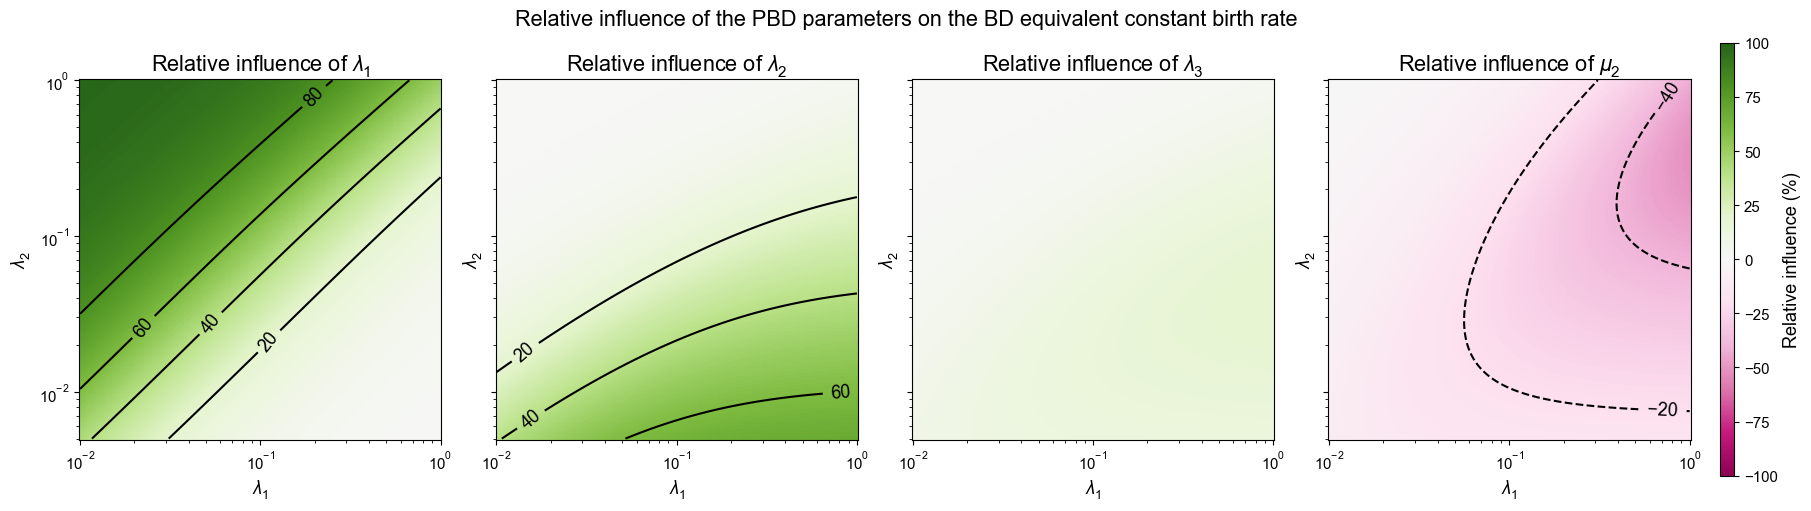

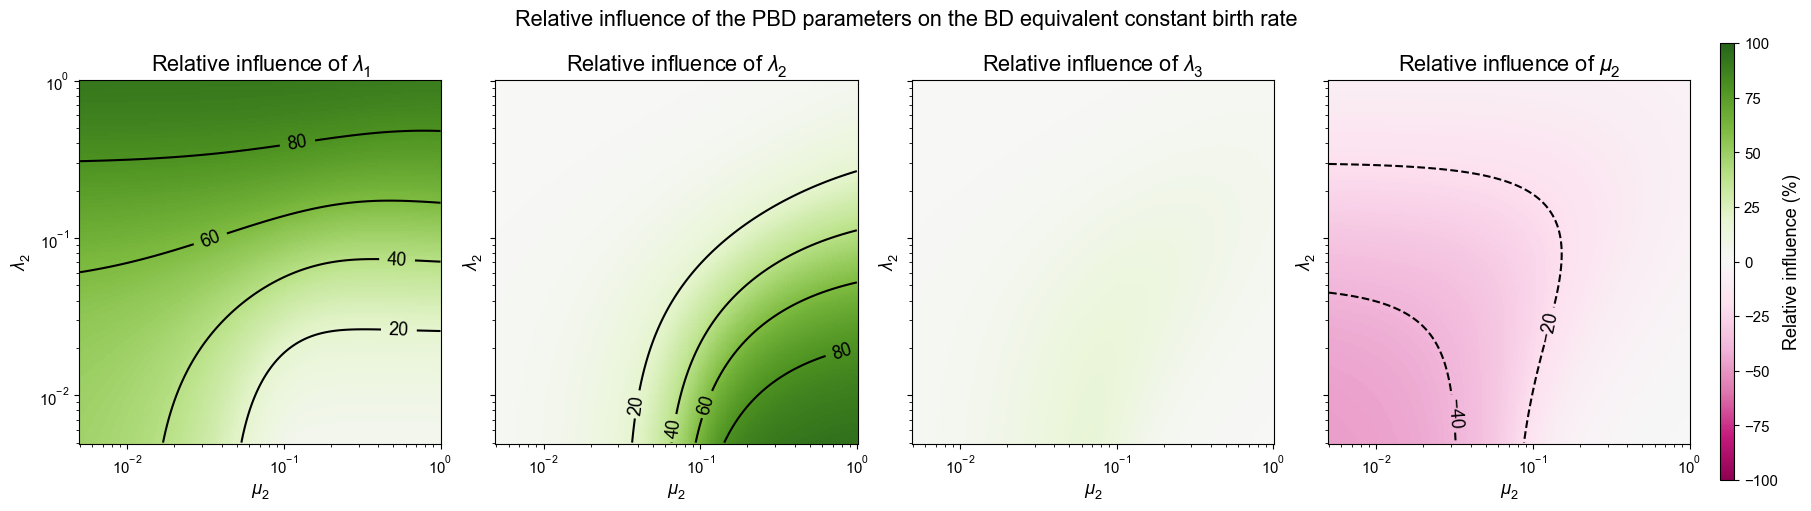

In [6]:

fig, axes = plt.subplots(1, 4,figsize = (18,5), sharex=True, sharey=True, layout = "constrained")

colormap = dict(cmap = "PiYG", vmin = -100, vmax = 100)
levels = np.linspace(-100, 100, 11)

for i in range(4):
    i_pbd = [0,1,2,4][i]
    ax = axes[i]
    ax.set_xscale("log")
    ax.set_yscale("log")
    im = ax.pcolormesh(l1, l2, relatJacl1l2[0, i_pbd, :, :], **colormap)
    cont = ax.contour(l1, l2, relatJacl1l2[0, i_pbd, :, :], colors = "k", levels = levels)
    ax.clabel(cont, cont.levels)
    
    for axx in (ax, ax_r):
        axx.set_title("Relative influence of ${}$".format(pbd_names[i_pbd]))
        axx.set_xlabel("${}$".format(pbd_names[0]))
        axx.set_ylabel("${}$".format(pbd_names[1]))
    

fig.colorbar(im, label = "Relative influence (%)", shrink = 1.2, aspect = 30)
fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant birth rate")

plt.savefig("../fig/SM_relative_influence_l1l2.pdf")
plt.savefig("../fig/SM_relative_influence_l1l2.png")

fig, axes = plt.subplots(1, 4,figsize = (18,5), sharex=True, sharey=True, layout = "constrained")
colormap = dict(cmap = "PiYG", vmin = -100, vmax = 100)
levels = np.linspace(-100, 100, 11)

for i in range(4):
    i_pbd = [0,1,2,4][i]
    ax = axes[i]
    ax.set_xscale("log")
    ax.set_yscale("log")
    im = ax.pcolormesh(m2, l2, relatJacm2l2[0, i_pbd, :, :], **colormap)
    cont = ax.contour(m2, l2, relatJacm2l2[0, i_pbd, :, :], colors = "k", levels = levels)
    ax.clabel(cont, cont.levels)
    
    for axx in (ax, ax_r):
        axx.set_title("Relative influence of ${}$".format(pbd_names[i_pbd]))
        axx.set_xlabel("${}$".format(pbd_names[4]))
        axx.set_ylabel("${}$".format(pbd_names[1]))
    

fig.colorbar(im, label = "Relative influence (%)", shrink = 1.2, aspect = 30)
fig.suptitle("Relative influence of the PBD parameters on the BD equivalent constant birth rate")

plt.savefig("../fig/SM_relative_influence_m2l2.pdf")
plt.savefig("../fig/SM_relative_influence_m2l2.png")

In [7]:
def mix_color(c1,c2,c3,u1,u2,u3, geom = True):
    if geom:# Geometric mean
        return np.power(c1**u1 * c2**u2 * c3**u3, 1/(u1+u2+u3))
    return (c1*u1 + c2*u2 + c3*u3)/(u1+u2+u3)

In [8]:
def plot_grad_line(ax, x0, y0, x1, y1, n_ticks = 5,                   
                   lsty = dict(ls = "-", color = "k"), 
                   revert_marker = False, ticksize = 3):

    X = np.linspace(x0, x1, n_ticks)
    Y = np.linspace(y0, y1, n_ticks)
    m = mpl.markers.MarkerStyle(3)
    angle = np.pi * float(revert_marker) + np.arctan((y1-y0) / (x1-x0))
    m._transform.rotate(angle)
    ax.plot(X, Y, marker = m, **lsty, markersize = ticksize)

def add_examples(ax, annot):
    ax.scatter(annot["x"], annot["y"], marker = "o", s = 190, color = "white")
    for xi, yi, ti in zip(annot["x"], annot["y"], annot["t"]):
        ax.text(xi, yi, ti, c = "k", ha = "center", va = "center_baseline", size = 12)

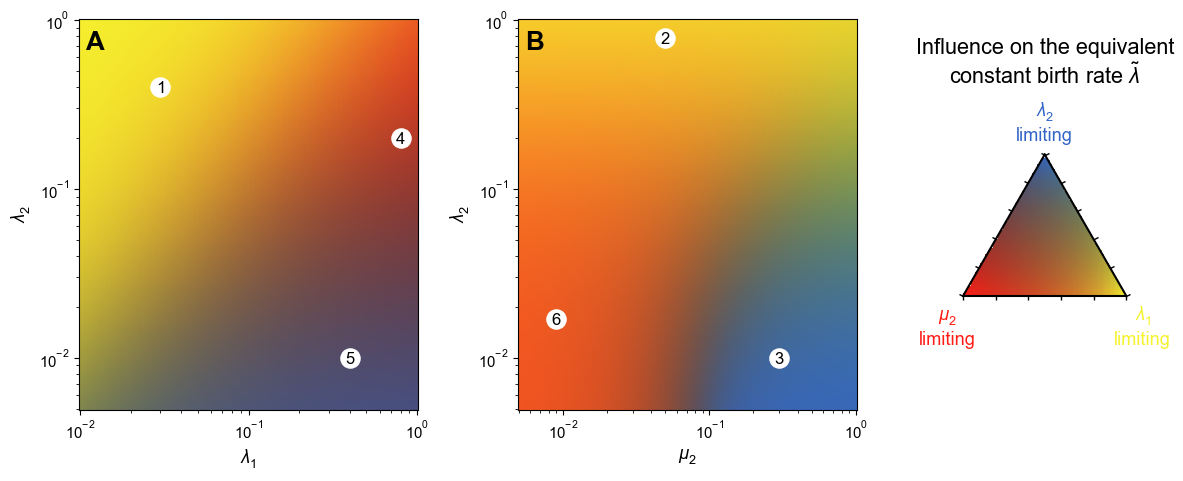

In [9]:
# Mix color matrix
col_l2 = np.array([51,100,200], dtype = float) / 255
col_l1 = np.array([245,242,45], dtype = float) / 255
col_m2 = np.array([255,29,21], dtype = float) / 255

geom = True

annotl1l2 = dict(x = [0.03, 0.8, 0.4],
                 y = [0.4, 0.2, 0.01], 
                 t = ['1','4','5'])
annotm2l2 = dict(x = [0.3, 0.009, 0.05], 
                 y = [0.01, 0.017, 0.78], 
                 t = ['3', '6', '2'])
# l1 vs l2
sumJacl1l2 = np.sum(np.abs(varJacl1l2[0, np.array([0,1,4]), :, :]), axis = 0)
colMatl1l2 = np.zeros((len(l2), len(l1), 3))
for i_hue in range(3):
    colMatl1l2[:, :, i_hue] = mix_color(col_l1[i_hue], col_l2[i_hue], col_m2[i_hue],
                                        np.abs(varJacl1l2[0, 0, :, :]) / sumJacl1l2,
                                        np.abs(varJacl1l2[0, 1, :, :]) / sumJacl1l2,
                                        np.abs(varJacl1l2[0, 4, :, :]) / sumJacl1l2,
                                        geom=geom)


# m2 vs m2
sumJacm2l2 = np.sum(np.abs(varJacm2l2[0, np.array([0,1,4]), :, :]), axis = 0)
colMatm2l2 = np.zeros((len(l2), len(m2), 3))
for i_hue in range(3):
    colMatm2l2[:, :, i_hue] = mix_color(col_l1[i_hue], col_l2[i_hue], col_m2[i_hue],
                                        np.abs(varJacm2l2[0, 0, :, :]) / sumJacm2l2,
                                        np.abs(varJacm2l2[0, 1, :, :]) / sumJacm2l2,
                                        np.abs(varJacm2l2[0, 4, :, :]) / sumJacm2l2,
                                        geom=geom)

fig, axes = plt.subplots(1,3, figsize = (12, 5), width_ratios=(2.5,2.5,1.3))
ax = axes[0]
ax.set_xscale("log")
ax.set_yscale("log")
ax.pcolormesh(l1, l2, colMatl1l2, antialiased = True)

ax.set_xlabel("$\\lambda_1$")
ax.set_ylabel("$\\lambda_2$")

ax = axes[1]
ax.set_xscale("log")
ax.set_yscale("log")
ax.pcolormesh(m2, l2, colMatm2l2)

ax.set_xlabel("$\\mu_2$")
ax.set_ylabel("$\\lambda_2$")


# Add annotations
add_examples(axes[0], annotl1l2)
add_examples(axes[1], annotm2l2)
axes[0].text(x = 0.02, y = 0.92, s = 'A', weight = "bold", 
             size = "x-large", transform = axes[0].transAxes)
axes[1].text(x = 0.02, y = 0.92, s = 'B', weight = "bold", 
             size = "x-large", transform = axes[1].transAxes)

# Triangle caption
ax = axes[2]
ax.axis("off")
xtri, ytri = 0.5, np.sqrt(0.75) # coordinates triangle

x = np.linspace(-xtri-0.25, xtri + 0.25, 100)
y = np.linspace(-0.25, ytri + 0.25, 100)



captionmat = np.ones((len(y), len(x), 3))


def color_by_distance(xx, yy):
    d1 = 1-np.sqrt((xx - xtri)**2 + yy**2)
    d2 = 1-np.sqrt(xx**2 + (yy - ytri)**2)
    d3 = 1-np.sqrt((xx+xtri)**2 + yy**2)
    return mix_color(col_l1, col_l2, col_m2, d1, d2, d3, geom = geom)

for j in range(len(y)):
    yy = y[j]
    if yy>0 and yy <= 1:
        for i in range(len(x)):
            xx = x[i]
            if yy <= ytri - np.abs(xx)*ytri/xtri:
                captionmat[j,i,:] = color_by_distance(xx, yy)

ax.pcolormesh(x, y, captionmat)
ticklabels = ['', '20', '40', '60', '80', '']
plot_grad_line(ax, -xtri, 0, xtri, 0, 6)
plot_grad_line(ax, -xtri, 0, 0, ytri, 6, revert_marker=True)
plot_grad_line(ax, xtri, 0, 0, ytri, 6, revert_marker=True)

ax.text(x = 0.6, y = -0.3, s = "$\\lambda_1$\nlimiting", ha = 'center', color = col_l1)
ax.text(x = 0, y = 0.95, s = "$\\lambda_2$\nlimiting", ha = 'center', color = col_l2)
ax.text(x = -0.6, y = -0.3, s = "$\\mu_2$\nlimiting", ha = 'center', color = col_m2)

ax.set_aspect("equal", adjustable="box")
ax.tick_params(axis='y', which='major', pad=-15)

ax.set_xlim(-0.54,0.54)
ax.set_ylim(-0.25, 1.25)
ax.set_ylabel(None)
ax.set_title("Influence on the equivalent\nconstant birth rate $\\tilde\\lambda$")
plt.savefig("../fig/influence_parameters.pdf")
plt.savefig("../fig/influence_parameters.png")